In [1]:
!pip install imgaug
!pip install pixellib

     |████████████████████████████████| 71kB 6.8MB/s 
  Created wheel for imantics: filename=imantics-0.1.12-cp37-none-any.whl size=16033 sha256=ec63e5d743f819310d433d5234ccc20d5ec57291dba7f8f3272a9db7a8ace70b
  Stored in directory: /root/.cache/pip/wheels/73/93/1c/9e2fc52eb74441941bc76cac441ddcc2c7ad67b18e1849e62a
Successfully built imantics


In [2]:
import pixellib
from pixellib.custom_train import instance_custom_training
from pixellib.instance import custom_segmentation

In [3]:
!ls
%cd /content/drive/MyDrive/colab

drive  sample_data
/content/drive/MyDrive/colab


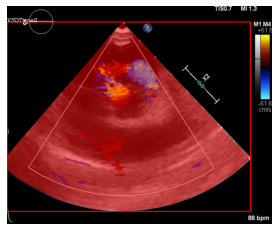

In [4]:


vis_img = instance_custom_training()
vis_img.load_dataset("Data")
vis_img.visualize_sample()

In [5]:
train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet50", num_classes= 3, batch_size = 4)
train_maskrcnn.load_pretrained_model("mask_rcnn_coco.h5")
train_maskrcnn.load_dataset("Data")
train_maskrcnn.train_model(num_epochs = 20, augmentation=True,  path_trained_models = "mask_rcnn_models")

Using resnet50 as network backbone For Mask R-CNN model
Applying Default Augmentation on Dataset
Train 3 images
Validate 3 images
Checkpoint Path: /content/drive/MyDrive/colab/mask_rcnn_models
Selecting layers to train
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/sub:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/GatherV2_2:0", shape=(None, 7, 7, 256), dtype=float32), dense_shape=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/Shape:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/sub_1:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_cl

100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 4.0000 - loss: 0.5851 - rpn_class_loss: 0.0015 - rpn_bbox_loss: 0.1007 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.1604 - mrcnn_mask_loss: 0.2642

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


100/100 [==============================] - 194s 1s/step - batch: 49.5000 - size: 4.0000 - loss: 0.5851 - rpn_class_loss: 0.0015 - rpn_bbox_loss: 0.1007 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.1604 - mrcnn_mask_loss: 0.2642 - val_loss: 0.1003 - val_rpn_class_loss: 2.2581e-04 - val_rpn_bbox_loss: 0.0090 - val_mrcnn_class_loss: 0.0139 - val_mrcnn_bbox_loss: 0.0289 - val_mrcnn_mask_loss: 0.0484
Epoch 2/20
100/100 [==============================] - 123s 1s/step - batch: 49.5000 - size: 4.0000 - loss: 0.0703 - rpn_class_loss: 2.1370e-04 - rpn_bbox_loss: 0.0052 - mrcnn_class_loss: 0.0140 - mrcnn_bbox_loss: 0.0111 - mrcnn_mask_loss: 0.0397 - val_loss: 0.0530 - val_rpn_class_loss: 2.0546e-04 - val_rpn_bbox_loss: 0.0041 - val_mrcnn_class_loss: 0.0118 - val_mrcnn_bbox_loss: 0.0046 - val_mrcnn_mask_loss: 0.0323
Epoch 3/20
100/100 [==============================] - 122s 1s/step - batch: 49.5000 - size: 4.0000 - loss: 0.0463 - rpn_class_loss: 1.5706e-04 - rpn_bbox_loss: 0.0021 - mrcnn_class_

In [7]:

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 3, class_names= ["BG","VSDType2", "VSDType1", "VSDType4"])
segment_image.load_model("mask_rcnn_models/mask_rcnn_model.011-0.036327.h5")
segment_image.segmentImage("Data/test/ZmNjwqpnZmlr-video11.avi-1.png", show_bboxes=True, output_image_name="sample_out.png")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed image saved successfully in your current working directory.


({'class_ids': array([], dtype=int32),
  'masks': array([], shape=(495, 700, 0), dtype=float64),
  'rois': array([], shape=(0, 4), dtype=int32),
  'scores': array([], dtype=float32)},
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [5, 5, 5],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
  